In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# img_id='2315816', len(filtered_instances)=24, len(gt_masks)=20, len(common)=11, len(relations)=12, len(new_relations)=6
line_regex = "img_id='(\d+)', len\(filtered_instances\)=(\d+), len\(gt_masks\)=(\d+), len\(common\)=(\d+), len\(relations\)=(\d+), len\(new_relations\)=(\d+)"

In [3]:
img_ids, filtered_instances, gt_masks, commons, relations, new_relations = [], [], [], [], [], []
with open("/cmlscratch/snawathe/dense-image-representations/dense-image-representations/ram_generate.log") as f:
	for line in f.readlines():
		matches = re.match(line_regex, line.strip())
		if matches is None: continue
		img_ids.append(matches[1])
		filtered_instances.append(int(matches[2]))
		gt_masks.append(int(matches[3]))
		commons.append(int(matches[4]))
		relations.append(int(matches[5]))
		new_relations.append(int(matches[6]))

In [12]:
(np.array(relations) == 0).sum(), (np.array(new_relations) == 0).sum(), (np.array(filtered_instances) == 0).sum(), (np.array(gt_masks) == 0).sum(), (np.array(commons) == 0).sum()

(np.int64(875), np.int64(3014), np.int64(1), np.int64(0), np.int64(45))

In [4]:
np.mean(relations), np.mean(new_relations)

(np.float64(5.6487517692670615), np.float64(3.8305811401259513))

In [16]:
np.mean(filtered_instances), np.mean(gt_masks), np.mean(commons)

(np.float64(11.742599848202014),
 np.float64(11.039262343842951),
 np.float64(6.944983486840756))

In [15]:
max(filtered_instances), max(gt_masks), max(relations), max(commons)

(53, 81, 43, 29)

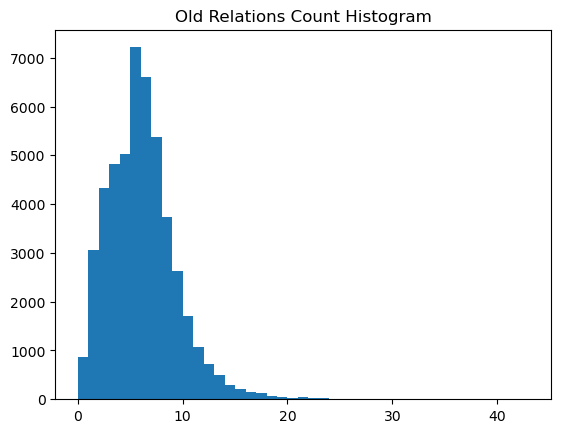

In [7]:
plt.hist(relations, bins=max(relations))
plt.title("Old Relations Count Histogram")
plt.show()

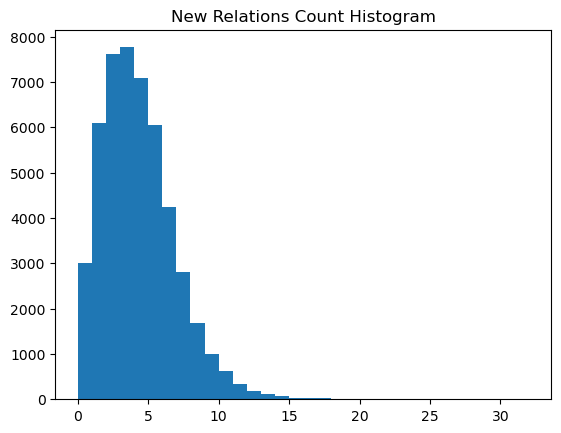

In [8]:
plt.hist(new_relations, bins=max(new_relations))
plt.title("New Relations Count Histogram")
plt.show()

In [9]:
max(new_relations)

32